
    This Source Code Form is subject to the terms of the Mozilla Public
    License, v. 2.0. If a copy of the MPL was not distributed with this
    file, You can obtain one at http://mozilla.org/MPL/2.0/.


In [1]:
# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# Load BACS module
from bacs.agents.bacs import BACS, Configuration

from bacs.agents.bacs.utils.Plotting_wrapper import \
    parse_metrics_to_df, \
    plot_performance

from bacs.metrics import \
    _maze_metrics, \
    _how_many_pees_match_non_aliased_states, \
    _mean_reliable_classifier_specificity, \
    _when_full_knowledge_is_achieved, \
    _state_of_population

# Load environments
import gym
import my_mazes

# Agent - BACS

## Common parameters

In [2]:
CLASSIFIER_LENGTH = 8
NUMBER_OF_POSSIBLE_ACTIONS = 8

MAZE = "Maze4-v0"
PROB_SLIPPERY = 0.25

NUMBER_OF_EXPLORE_TRIALS = 20000
METRICS_TRIAL_FREQUENCY_EXPLORE = 1
BETA_EXPLORE = 0.05
EPSILON = 0.8

DO_GA = True
ENABLE_PEE = True

## Environment - Maze

In [3]:
# Initialize environment
maze = gym.make(MAZE)
maze.env.set_prob_slippery(PROB_SLIPPERY)
# Reset it, by putting an agent into random position
situation = maze.reset()
# Render the state in ASCII
maze.render('aliasing_human')


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ A ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


## Training of BACS - Exploration

In [4]:
%%time

cfg_explore = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=METRICS_TRIAL_FREQUENCY_EXPLORE,
    do_pee=ENABLE_PEE,
    do_ga=DO_GA,
    beta=BETA_EXPLORE,
    gamma=0.95,
    theta_i=0.1,
    theta_r=0.9,
    epsilon=EPSILON,
    u_max=CLASSIFIER_LENGTH,
    theta_exp=20,
    theta_ga=100,
    theta_as=20,
    mu=0.3,
    chi=0.8,
    bs_max=0
)

agent_explore = BACS(cfg_explore)
population_explore, metrics_explore = agent_explore.explore(maze, NUMBER_OF_EXPLORE_TRIALS)

CPU times: user 3h 17min 59s, sys: 1.81 s, total: 3h 18min 1s
Wall time: 3h 18min 1s


### Performance

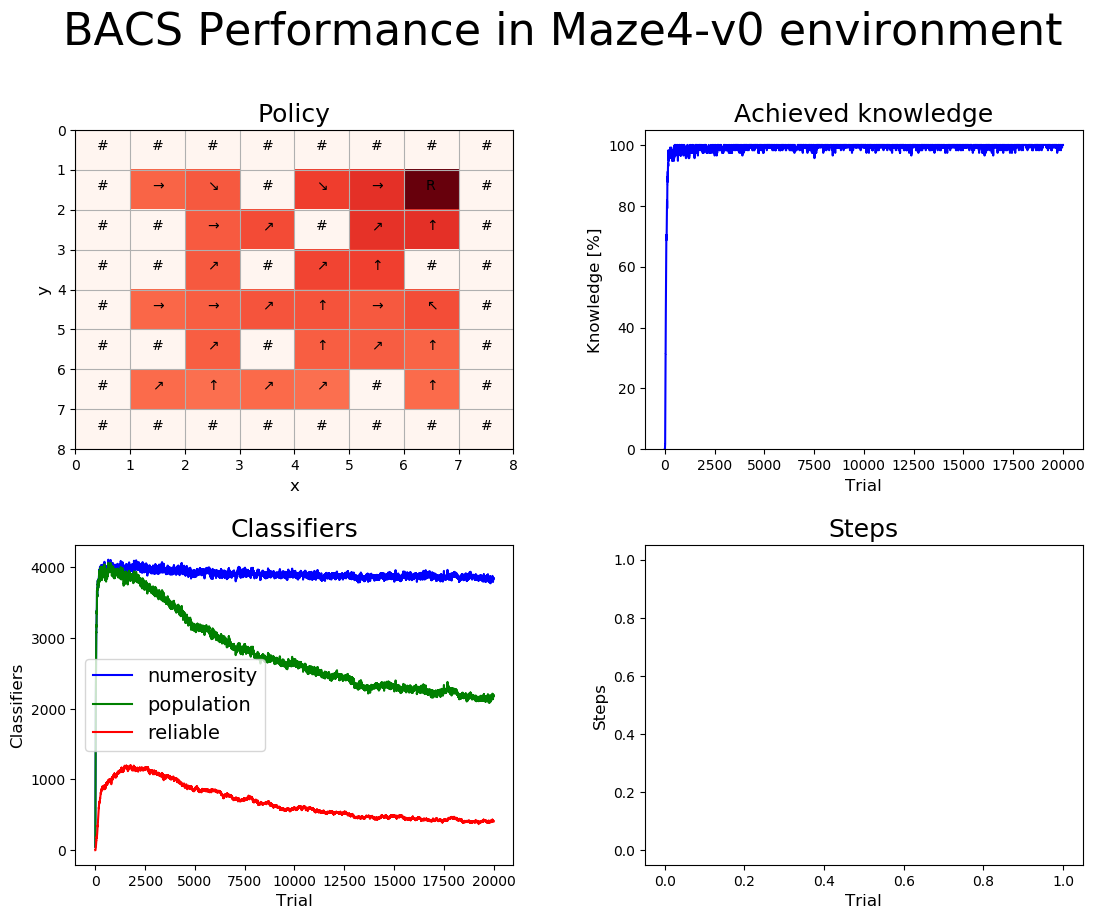

In [5]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, None, None)
plot_performance(agent_explore, maze, metrics_df, cfg_explore, MAZE, metrics_trial_frequency_explore, None)

In [6]:
print(_maze_metrics(population_explore, maze))

first_trial, stable_trial = _when_full_knowledge_is_achieved(metrics_explore)

print("Full knowledge was achieved at trials ", first_trial, " and was stable at ", stable_trial)

print("There are ", _how_many_pees_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.")

print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(population_explore, maze))

print(_state_of_population(metrics_explore, first_trial))

{'knowledge': 100.0, 'population': 2194, 'numerosity': 3849, 'reliable': 407}
Full knowledge was achieved at trials  500  and was stable at  19960
There are  347  enhanced classifer(s) that match a non-aliased states.
Mean reliable population specifity is  0.9484029484029484
{'trial': 500, 'steps_in_trial': 100, 'reward': 0, 'knowledge': 100.0, 'population': 3869, 'numerosity': 3916, 'reliable': 868}


In [7]:
population_explore.sort(key=lambda cl: -cl.fitness)
population_explore_to_display = [cl for cl in population_explore
    if cl.is_enhanced()]
for cl in population_explore_to_display:
    print(cl)
    print("\n")

91111000 0 None {1:64.74%, 9:18.49%, 0:16.78%}{1:74.57%, 9:15.16%, 0:10.27%}{1:72.83%, 0:15.26%, 9:11.91%}{1:79.25%, 0:20.75%}{0:75.23%, 1:24.77%}{0:83.82%, 1:16.18%}{0:80.56%, 1:19.44%}{1:68.71%, 0:31.29%} (empty)               
q: 1.0   r: 982.9  ir: 777.0  f: 982.9  exp: 6420 tga: 635403 talp: 635404 tav: 99.5   num: 9 ee: False


11900101 2 None {1:69.09%, 0:17.30%, 9:13.61%}{1:77.53%, 9:22.47%}{1:63.51%, 9:18.48%, 0:18.01%}{1:73.22%, 0:26.78%}{0:77.65%, 1:22.35%}{0:74.77%, 1:25.23%}{0:74.89%, 1:25.11%}{1:71.17%, 0:28.83%} (empty)               
q: 1.0   r: 981.2  ir: 750.5  f: 981.2  exp: 6381 tga: 635410 talp: 635451 tav: 90.4   num: 11 ee: False


09010010 1 None {1:71.54%, 0:20.57%, 9:7.89%}{1:69.70%, 0:15.52%, 9:14.78%}{1:63.74%, 0:25.64%, 9:10.62%}{1:67.96%, 0:32.04%}{0:78.45%, 1:21.55%}{0:81.69%, 1:18.31%}{0:70.37%, 1:29.63%}{1:72.33%, 0:27.67%} (empty)               
q: 1.0   r: 969.6  ir: 713.2  f: 969.6  exp: 8275 tga: 635423 talp: 635464 tav: 87.6   num: 12 ee: False


1



00100001 3 None {1:68.44%, 9:17.69%, 0:13.87%}{1:80.41%, 9:19.59%}{1:80.17%, 0:19.83%}{1:100.00%}{0:76.97%, 1:23.03%}#{0:80.41%, 1:19.59%}{0:100.00%} (00100001)            
q: 0.906 r: 828.5  ir: 0.0    f: 750.3  exp: 188 tga: 635300 talp: 635349 tav: 88.7   num: 1 ee: True


00010010 2 None {0:77.87%, 1:22.13%}{0:85.91%, 1:14.09%}{0:84.77%, 1:15.23%}{0:73.25%, 1:26.75%}{1:78.36%, 0:21.64%}{0:74.19%, 1:25.81%}{0:82.85%, 1:17.15%}{0:81.13%, 1:18.87%} (empty)               
q: 1.0   r: 748.9  ir: 0.0    f: 748.9  exp: 1398 tga: 634860 talp: 634936 tav: 3.13e+02 num: 13 ee: False


01010110 1 None {0:56.52%, 1:43.48%}#{0:62.96%, 1:37.04%}{1:51.59%, 0:48.41%}{0:84.13%, 1:15.87%}#{1:62.96%, 0:37.04%}{0:56.52%, 1:43.48%} (01010110)            
q: 0.977 r: 766.4  ir: 0.0    f: 748.6  exp: 16  tga: 635048 talp: 635049 tav: 2.62e+02 num: 1 ee: True


00001000 4 None {0:87.41%, 1:12.59%}{0:75.42%, 1:24.58%}{0:75.06%, 1:24.94%}{0:68.19%, 1:31.81%}{1:72.56%, 0:27.44%}{0:76.94%, 1:23.06%}{0:72.87

q: 0.857 r: 758.4  ir: 0.0    f: 649.9  exp: 12  tga: 635323 talp: 635324 tav: 2.2e+02 num: 1 ee: True


01010101 6 None {1:100.00%}{0:100.00%}#{0:100.00%}{1:100.00%}#{1:100.00%}# (01010101)            
q: 0.913 r: 711.1  ir: 0.0    f: 649.2  exp: 19  tga: 634697 talp: 634791 tav: 3.45e+02 num: 1 ee: True


10#11100 6 None {0:100.00%}{1:100.00%}#####{1:100.00%} (10011100)            
q: 0.921 r: 703.1  ir: 0.0    f: 647.9  exp: 20  tga: 634970 talp: 634971 tav: 4.01e+02 num: 1 ee: True


01110100 7 None #{1:89.39%, 0:10.61%}{0:100.00%}{0:100.00%}{0:89.39%, 1:10.61%}{0:100.00%}## (01110100)            
q: 0.841 r: 770.1  ir: 0.0    f: 647.8  exp: 128 tga: 635328 talp: 635329 tav: 1.51e+02 num: 1 ee: True


0#100001 4 None #{1:100.00%}{0:100.00%}####{0:100.00%} (00100001)            
q: 0.836 r: 774.5  ir: 0.0    f: 647.2  exp: 17  tga: 635169 talp: 635170 tav: 2.13e+02 num: 1 ee: True


00111101 0 None ##{0:100.00%}#{0:100.00%}{0:100.00%}{1:100.00%}{0:100.00%} (00111101)            
q: 